In [31]:
import itertools
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import Birch

In [32]:
data = pd.read_csv('../data/processed/processed.csv')

In [33]:
data_rows = len(data)
scores = []
branching_factors = np.arange(2, 51, 1)
thresholds = np.arange(0.1, 10, 0.1)

for branching_factor in branching_factors: 
    for threshold in thresholds: 
        birch = Birch(n_clusters=None, threshold=threshold, branching_factor=branching_factor)
        prediction = birch.fit_predict(X=data)
        n_clusters = len(np.unique(prediction))
        
        if 1 < n_clusters < data_rows:
            sc = silhouette_score(data, prediction)
            db = davies_bouldin_score(data, prediction)
            ch = calinski_harabasz_score(data, prediction)
            
            scores.append((branching_factor, threshold, sc, db, ch, prediction, n_clusters))


In [34]:
tested_branching_factors, tested_thresholds, scs, dbs, chs, predictions, n_clusters = zip(*scores)
placings_per_alt = {}

for i in range(len(scores)):
    placings_per_alt[(tested_branching_factors[i], tested_thresholds[i])] = {
        'branching_factor': tested_branching_factors[i],
        'threshold': tested_thresholds[i],
        'silhouette coefficient': scs[i],
        'davies-bouldin index': dbs[i],
        'calinski-harabasz index': chs[i],
        'prediction': predictions[i],
        'clusters': n_clusters[i]
    }

sorted_by_max_sc = sorted(scores, key=lambda score: score[2], reverse=True)
sorted_by_min_db = sorted(scores, key=lambda score: score[3], reverse=False)
sorted_by_max_ch = sorted(scores, key=lambda score: score[4], reverse=True)

for index, score in enumerate(sorted_by_max_sc):
    placings_per_alt[(score[0], score[1])]['max_sc'] = index

for index, score in enumerate(sorted_by_min_db):
    placings_per_alt[(score[0], score[1])]['min_db'] = index

for index, score in enumerate(sorted_by_max_ch):
    placings_per_alt[(score[0], score[1])]['max_ch'] = index

In [35]:
def overall_placing(score):
    alt = placings_per_alt[(score[0], score[1])]
    return (alt['max_sc'] + alt['min_db'] + alt['max_ch']) / 3

sorted_scores_on_overall = sorted(scores, key=overall_placing, reverse=False)

for index, score in enumerate(sorted_scores_on_overall):
    placings_per_alt[(score[0], score[1])]['overall'] = index

alternatives = sorted(placings_per_alt.values(), key=lambda alt: alt['overall'])
alternatives = [alternative.values() for alternative in alternatives]

In [36]:
sorted_branching_factors, sorted_thresholds, sorted_scs, sorted_dbs, sorted_chs, sorted_predictions, sorted_clusters, sorted_placing_sc, sorted_placing_db, sorted_placing_ch, sorted_overall = zip(*alternatives)

def points_in_clusters(distribution):
    amount_of_points_in_cluster = {}
    for cluster_id in distribution:
        if cluster_id in amount_of_points_in_cluster:
            amount_of_points_in_cluster[cluster_id] += 1
        else:
            amount_of_points_in_cluster[cluster_id] = 1
    return tuple(amount_of_points_in_cluster.values())

def print_info(i):
    print(
        f'{sorted_overall[i]:>2}. '
        f'threshold={sorted_thresholds[i]:.1f}, branching_factor={sorted_branching_factors[i]:2}.'
        f' Scores: SC={sorted_scs[i]:.2f}, DB={sorted_dbs[i]:.2f}, CH={sorted_chs[i]:>6.2f}. '
        f'Clusters: {str(points_in_clusters(sorted_predictions[i]))[:20]:<20}'
    )

In [37]:
top_amount = 30

for i in range(top_amount):
    print_info(i)

 0. threshold=0.7, branching_factor= 2. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 1. threshold=0.7, branching_factor= 3. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 2. threshold=0.7, branching_factor= 4. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 3. threshold=0.7, branching_factor= 5. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 4. threshold=0.7, branching_factor= 6. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 5. threshold=0.7, branching_factor= 7. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 6. threshold=0.7, branching_factor= 8. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 7. threshold=0.7, branching_factor= 9. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 8. threshold=0.7, branching_factor=10. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 9. threshold=0.7, branching

In [38]:
def is_trivial(i):
    return sorted_clusters[i] >= 208 or points_in_clusters(sorted_predictions[i])[0] >= 208

top_no_trivial = [i for i in range(len(sorted_overall)) if not is_trivial(i)][:top_amount]

for i in top_no_trivial:
    print_info(i)

 0. threshold=0.7, branching_factor= 2. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 1. threshold=0.7, branching_factor= 3. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 2. threshold=0.7, branching_factor= 4. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 3. threshold=0.7, branching_factor= 5. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 4. threshold=0.7, branching_factor= 6. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 5. threshold=0.7, branching_factor= 7. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 6. threshold=0.7, branching_factor= 8. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 7. threshold=0.7, branching_factor= 9. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 8. threshold=0.7, branching_factor=10. Scores: SC=0.30, DB=1.23, CH=112.80. Clusters: (123, 87)           
 9. threshold=0.7, branching

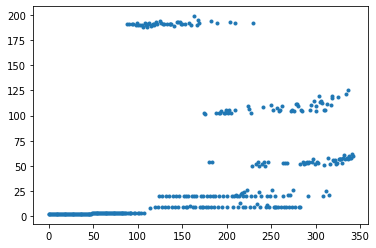

In [39]:
plt.plot(sorted_overall, sorted_clusters,'.')
plt.show()

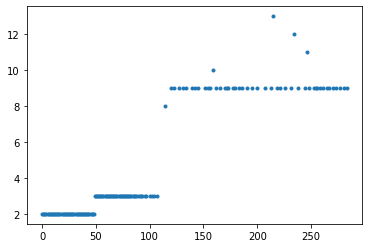

In [40]:
clusterings_under_20 = [(index, cluster_amount) for index, cluster_amount in enumerate(sorted_clusters) if cluster_amount < 20 ]
indexes_u20, cluster_amount_u20 = zip(*clusterings_under_20)

plt.plot(indexes_u20, cluster_amount_u20,'.')
plt.show()